In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.datasets import cifar100
from keras.layers import Conv2D, MaxPooling2D,Flatten
import keras
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import keras
from keras.models import *
from keras.layers import *

from keras.callbacks import EarlyStopping

In [4]:
# train
directory = '/content/drive/MyDrive/archive (1)/Data/train'

data_list = []
for filename in os.listdir(directory):
    for img in os.listdir(directory+"/"+filename):
        data_list.append({'directory':directory+"/"+filename+"/"+img, 'class':filename})

data_df = pd.concat([pd.DataFrame(data_list)], ignore_index=True)

                                             directory  \
293  /content/drive/MyDrive/archive (1)/Data/train/...   
501  /content/drive/MyDrive/archive (1)/Data/train/...   
318  /content/drive/MyDrive/archive (1)/Data/train/...   
329  /content/drive/MyDrive/archive (1)/Data/train/...   
370  /content/drive/MyDrive/archive (1)/Data/train/...   

                                                class  
293     large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa  
501                                            normal  
318  squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa  
329  squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa  
370  squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa  
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa 000016 (3).png
(296, 401, 3)


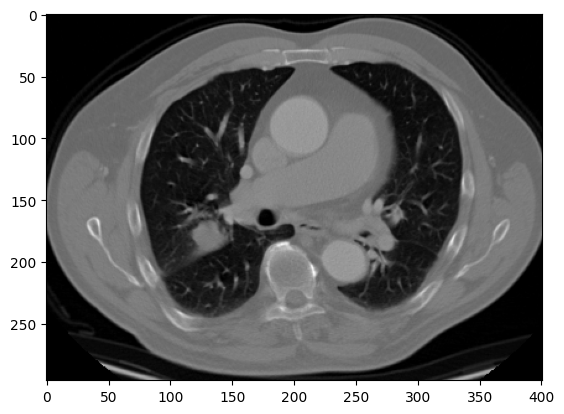

In [5]:
data_df = data_df.sample(frac = 1, random_state=7)
print(data_df.head(5))

test_img_path = data_df.iloc[2][0]
test_img = cv2.imread(test_img_path)
print(test_img_path.split("/")[-2], test_img_path.split("/")[-1])
print(test_img.shape)
plt.imshow(test_img)

In [6]:
batch_size = 64
size = (224,224,3)
img_width = img_hight = size[0]
random_state = 7

classes = list(data_df['class'].unique())

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255)
train_data = train_gen.flow_from_directory(
    '/content/drive/MyDrive/archive (1)/Data/train',target_size=(img_hight, img_hight),
    batch_size=batch_size, class_mode='categorical',
    classes=classes, seed=42,shuffle=True,subset='training')

test_gen = ImageDataGenerator(rescale=1./255)
test_data = train_gen.flow_from_directory(
    '/content/drive/MyDrive/archive (1)/Data/test',target_size=(img_hight, img_hight),
    batch_size=batch_size, class_mode='categorical',
    classes=classes, seed=42,shuffle=True)

valid_gen = ImageDataGenerator(rescale=1./255)
valid_data = train_gen.flow_from_directory(
    '/content/drive/MyDrive/archive (1)/Data/valid',target_size=(img_hight, img_hight),
    batch_size=batch_size, class_mode='categorical',
    classes=classes, seed=42,shuffle=True)



Found 613 images belonging to 4 classes.
Found 54 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [8]:
def Create_model(Image_shape, block1=True, block2=True, block3=True,
                 block4=True, block5=True, regularizer=keras.regularizers.l2(0.0001),
                 Dropout_ratio=0.25):

    # * Create the model
    model = keras.Sequential()

    # * configure the inputshape
    model.add(keras.Input(shape=Image_shape))

    # * Add the first block
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
              trainable=block1))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu',
              trainable=block1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(BatchNormalization())

    # * Add the second block
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu',
              trainable=block2))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu',
              trainable=block2))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # * Add the third block
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu',
              trainable=block3))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu',
              trainable=block3))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
       # * Add the fourth block
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu',
              trainable=block4))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu',
              trainable=block4))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu',
              trainable=block4))

    #* flatten + Fc layer
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(Dropout_ratio))

    # * Output layer
    #model.add(Dense(3, activation='linear'))
    model.add(Dense(4, activation='softmax'))
    print('Done')
    return model
model = Create_model(size)


Done


In [9]:

# Compile the model
model.compile(Adam(), keras.losses.CategoricalCrossentropy(),metrics='accuracy')

In [10]:
results=model.fit(
    train_data,
    validation_data= test_data,
    epochs=50
  )

Epoch 1/50
10/10 [==============================] - 126s 10s/step - loss: 29.7849 - accuracy: 0.3328 - val_loss: 1.3117 - val_accuracy: 0.7778
Epoch 2/50
10/10 [==============================] - 7s 711ms/step - loss: 1.2028 - accuracy: 0.3964 - val_loss: 1.3447 - val_accuracy: 0.5556
Epoch 3/50
10/10 [==============================] - 8s 764ms/step - loss: 1.1937 - accuracy: 0.4323 - val_loss: 1.3463 - val_accuracy: 0.5556
Epoch 4/50
10/10 [==============================] - 8s 723ms/step - loss: 1.1691 - accuracy: 0.4144 - val_loss: 1.3518 - val_accuracy: 0.4074
Epoch 5/50
10/10 [==============================] - 8s 758ms/step - loss: 1.1535 - accuracy: 0.4535 - val_loss: 1.4015 - val_accuracy: 0.0000e+00
Epoch 6/50
10/10 [==============================] - 8s 787ms/step - loss: 1.0860 - accuracy: 0.4861 - val_loss: 1.4206 - val_accuracy: 0.2037
Epoch 7/50
10/10 [==============================] - 8s 759ms/step - loss: 1.0360 - accuracy: 0.4878 - val_loss: 1.4084 - val_accuracy: 0.0000e+

Text(0, 0.5, 'losses')

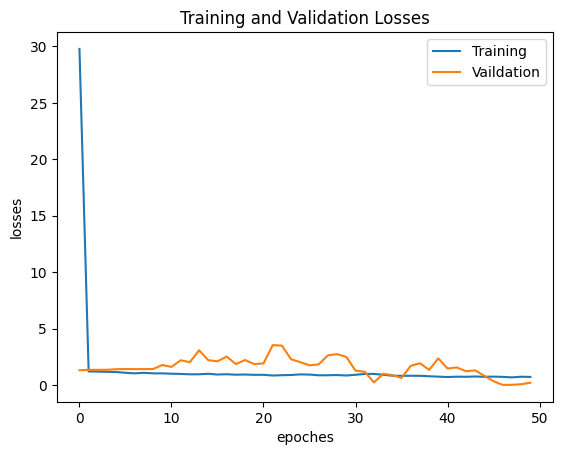

In [11]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoches')
plt.ylabel('losses')

Text(0, 0.5, 'accuracy')

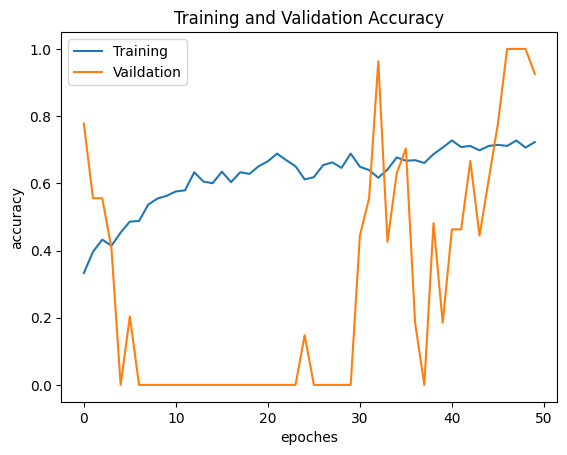

In [12]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')

In [13]:
y_pred= model.predict(test_data)
import numpy as np
y_pred1=np.argmax(y_pred,axis=1)

1/1 [==============================] - 1s 1s/step


In [14]:
from sklearn.metrics import accuracy_score,  confusion_matrix
confusion_matrix = confusion_matrix(test_data.labels,y_pred1)
print(confusion_matrix)

accuracy_score(test_data.labels,y_pred1)*100

[[50  4]
 [ 0  0]]


92.5925925925926

In [15]:
from sklearn.metrics import classification_report
report=classification_report(test_data.labels,y_pred1)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        54
           3       0.00      0.00      0.00         0

    accuracy                           0.93        54
   macro avg       0.50      0.46      0.48        54
weighted avg       1.00      0.93      0.96        54



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
